In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Cleaning

### Cleaned data & added new columns to measure performance metrics in visualizations and insights

In [2]:
df = pd.read_csv('orders.csv', na_values=['Not Available', 'unknown'])

df.columns = df.columns.str.lower().str.replace(' ', '_')

df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%m-%d')

In [3]:
df['discounted_price'] = df['list_price']-df['list_price']*df['discount_percent']*.01
df['net_profit'] = df['discounted_price']-df['cost_price']

df.drop(columns=['list_price', 'cost_price', 'discount_percent'], inplace=True)

In [4]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discounted_price,net_profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,19.0,-1.0


# Data Visualization

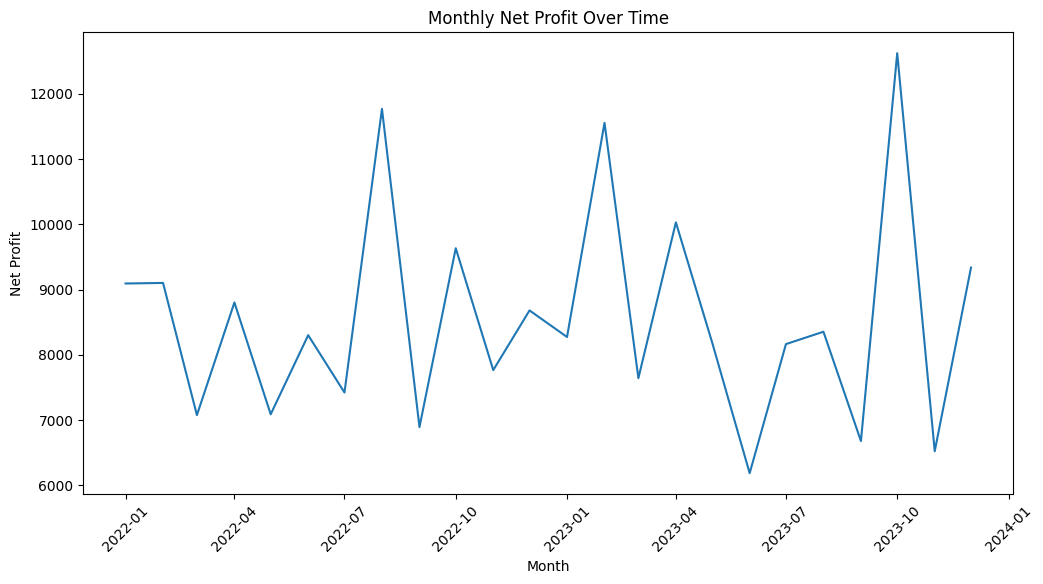

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['net_profit'].sum().reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(x='order_date', y='net_profit', data=monthly_sales)
plt.title('Monthly Net Profit Over Time')
plt.xlabel('Month')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.show()


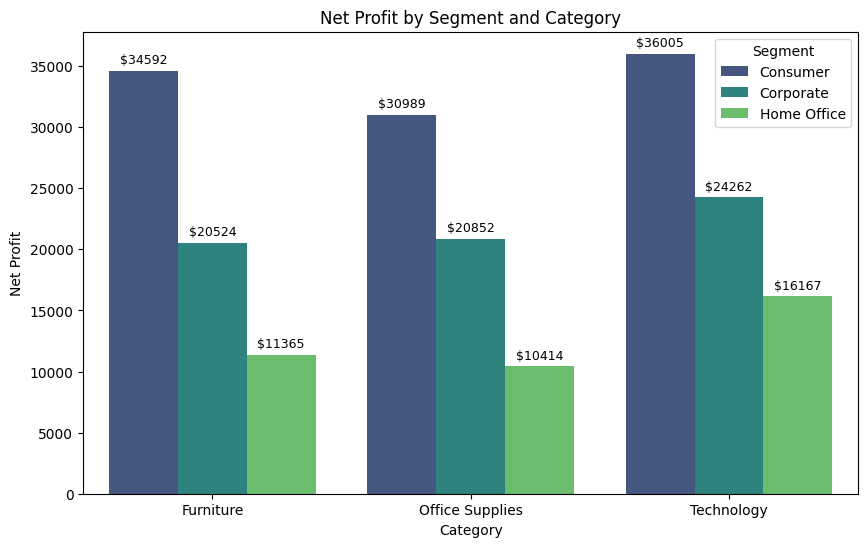

In [27]:
net_profit_by_segment_category = df.groupby(['segment', 'category'])['net_profit'].sum().reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(x='category', y='net_profit', hue='segment', data=net_profit_by_segment_category, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Net Profit')
plt.title('Net Profit by Segment and Category')
plt.legend(title='Segment')

for container in ax.containers:
    ax.bar_label(container, fmt='$%.0f', padding=3, fontsize=9)

plt.show()

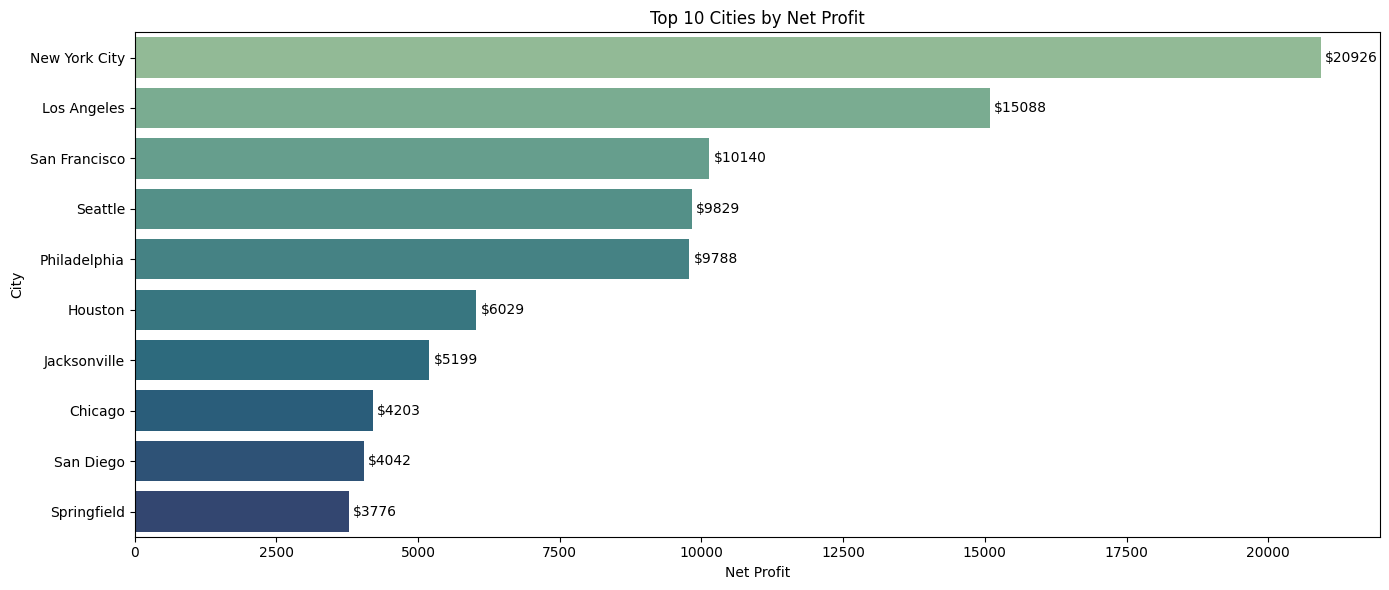

In [37]:
top_cities = df.groupby('city')['net_profit'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(14,6))
ax = sns.barplot(x='net_profit', y='city', data=top_cities, hue='city', palette='crest')
plt.title('Top 10 Cities by Net Profit')
plt.xlabel('Net Profit')
plt.ylabel('City')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='$%.0f', padding=3, fontsize=10)

plt.show()


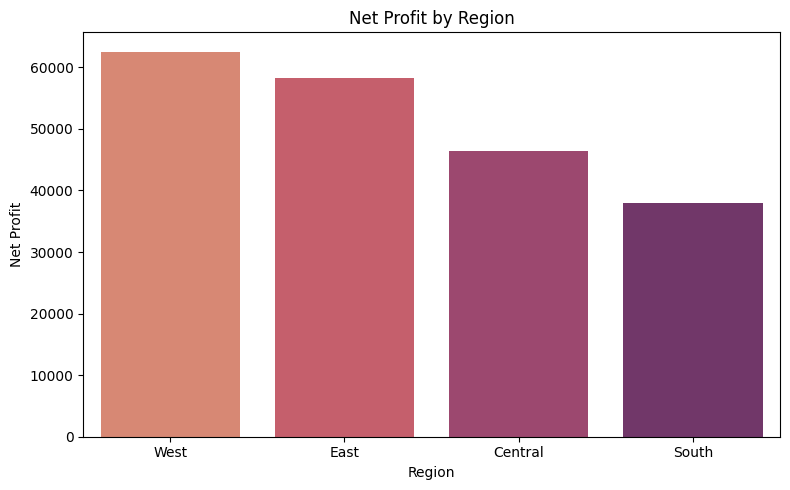

In [38]:
region_profit = df.groupby('region')['net_profit'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='region', y='net_profit', data=region_profit, hue='region', palette='flare')
plt.title('Net Profit by Region')
plt.xlabel('Region')
plt.ylabel('Net Profit')
plt.tight_layout()
plt.show()

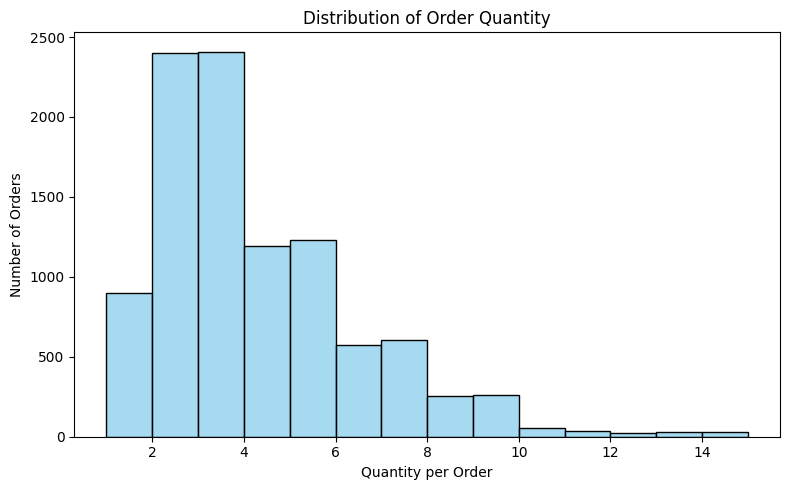

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['quantity'], bins=range(1, df['quantity'].max()+2), kde=False, color='skyblue')
plt.title('Distribution of Order Quantity')
plt.xlabel('Quantity per Order')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()